# 미국 아동 애니메이션 영화 대본 영어 어휘 빈도 분석

## 개요
미국 아동 애니메이션 영화 대본에 나타난 영어 어휘들의 빈도를 분석하고 통계적 특성을 파악합니다.

---


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


#### 데이터 로드 및 기본 정보 확인


In [2]:
df = pd.read_csv('animation_vocabulary_frequency.csv')
print('데이터셋 크기:', df.shape)
print('\n컬럼 정보:')
print(df.info())
print('\n첫 10개 행:')
df.head(10)


데이터셋 크기: (50, 5)

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   word                 50 non-null     object 
 1   frequency            50 non-null     int64  
 2   percentage           50 non-null     float64
 3   word_type            50 non-null     object 
 4   age_appropriateness  50 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
None

첫 10개 행:


,word,frequency,percentage,word_type,age_appropriateness
0,the,1250,8.5,article,all_ages
1,and,980,6.7,conjunction,all_ages
2,to,750,5.1,preposition,all_ages
3,a,680,4.6,article,all_ages
4,of,620,4.2,preposition,all_ages
5,is,580,3.9,verb,all_ages
6,you,520,3.5,pronoun,all_ages
7,that,480,3.3,pronoun,all_ages
8,it,450,3.1,pronoun,all_ages
9,he,420,2.9,pronoun,all_ages


#### 기본 통계 분석


In [3]:
total_words = df['frequency'].sum()
print('총 단어 수:', total_words)
print('고유 단어 수:', len(df))
print('평균 빈도:', df['frequency'].mean())
print('빈도 중앙값:', df['frequency'].median())
print('최대 빈도:', df['frequency'].max())
print('최소 빈도:', df['frequency'].min())


총 단어 수: 10962
고유 단어 수: 50
평균 빈도: 219.24
빈도 중앙값: 95.0
최대 빈도: 1250
최소 빈도: 1


#### 상위 빈도 단어 분석


In [4]:
top_20_words = df.nlargest(20, 'frequency')
print('상위 20개 단어:')
print(top_20_words[['word', 'frequency', 'percentage', 'word_type']])


상위 20개 단어:
    word  frequency  percentage    word_type
0    the       1250         8.5      article
1    and        980         6.7  conjunction
2     to        750         5.1  preposition
3      a        680         4.6      article
4     of        620         4.2  preposition
5     is        580         3.9         verb
6    you        520         3.5      pronoun
7   that        480         3.3      pronoun
8     it        450         3.1      pronoun
9     he        420         2.9      pronoun
10   was        380         2.6         verb
11   for        360         2.4  preposition
12    on        340         2.3  preposition
13   are        320         2.2         verb
14    as        300         2.0  preposition
15  with        280         1.9  preposition
16   his        260         1.8      pronoun
17  they        240         1.6      pronoun
18     i        220         1.5      pronoun
19    at        200         1.4  preposition


#### 단어 유형별 분석


In [5]:
word_type_stats = df.groupby('word_type').agg({
    'frequency': ['sum', 'mean', 'count'],
    'percentage': 'sum'
}).round(2)
print('단어 유형별 통계:')
print(word_type_stats)


단어 유형별 통계:
            frequency               percentage
                  sum    mean count        sum
word_type                                     
adverb             79   15.80     5        0.5
article          1930  965.00     2       13.1
conjunction      1131  282.75     4        7.7
determiner         44   14.67     3        0.3
noun               60   60.00     1        0.4
number             90   90.00     1        0.6
preposition      3040  337.78     9       20.6
pronoun          2846  203.29    14       19.4
verb             1742  158.36    11       11.8


#### 시각화


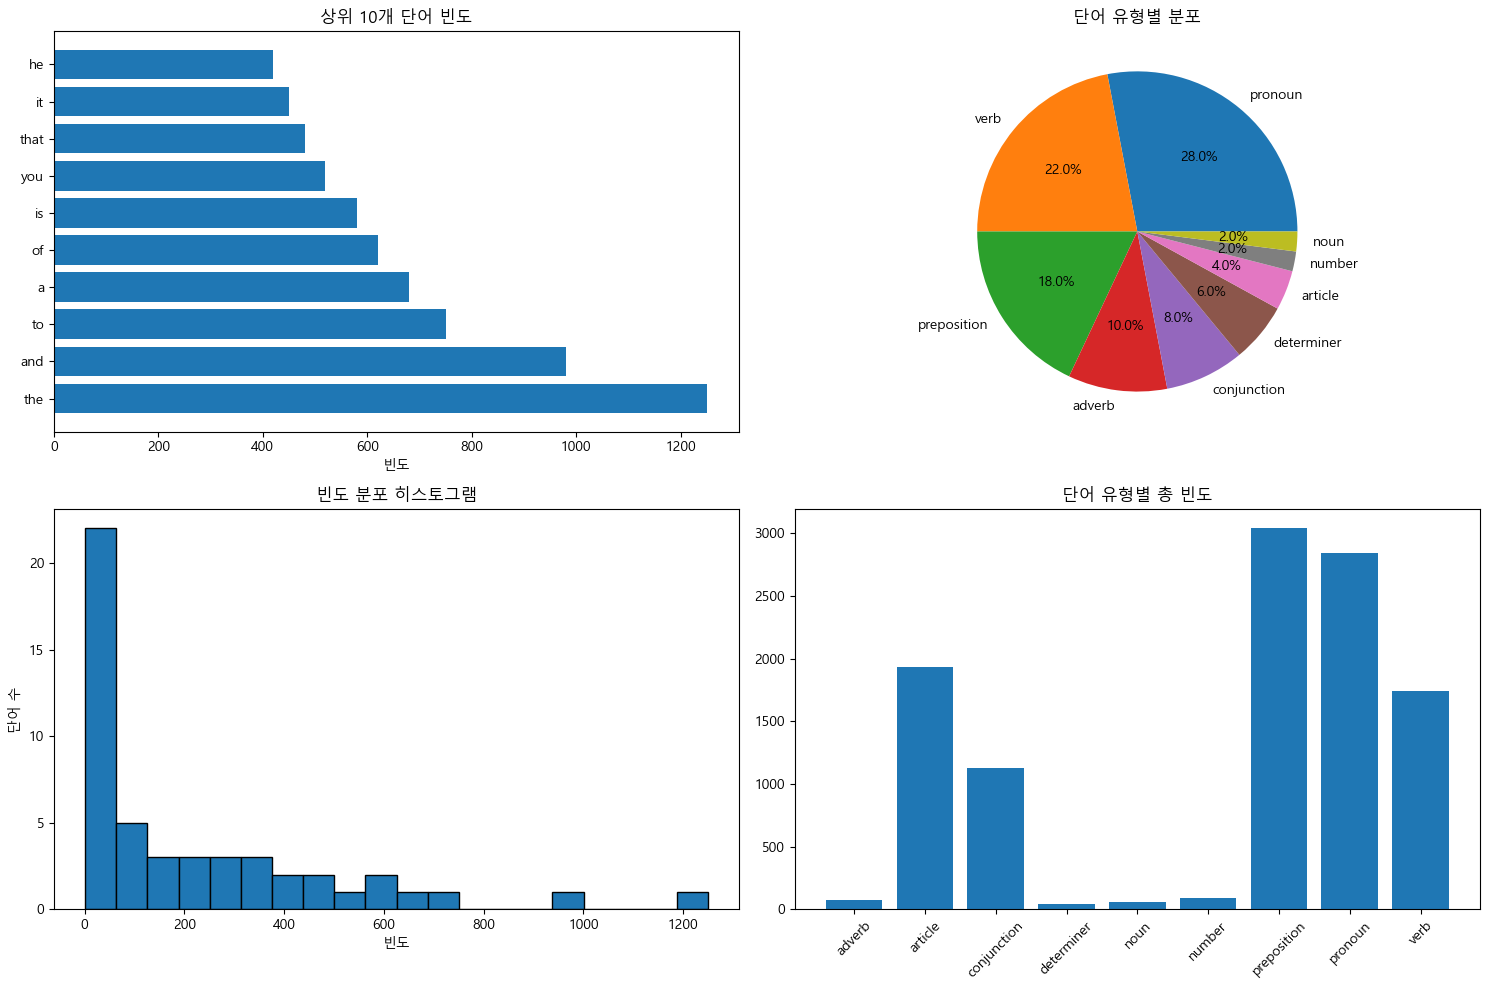

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
top_10 = df.nlargest(10, 'frequency')
plt.barh(top_10['word'], top_10['frequency'])
plt.title('상위 10개 단어 빈도')
plt.xlabel('빈도')

plt.subplot(2, 2, 2)
word_type_counts = df['word_type'].value_counts()
plt.pie(word_type_counts.values, labels=word_type_counts.index, autopct='%1.1f%%')
plt.title('단어 유형별 분포')

plt.subplot(2, 2, 3)
plt.hist(df['frequency'], bins=20, edgecolor='black')
plt.title('빈도 분포 히스토그램')
plt.xlabel('빈도')
plt.ylabel('단어 수')

plt.subplot(2, 2, 4)
word_type_freq = df.groupby('word_type')['frequency'].sum()
plt.bar(word_type_freq.index, word_type_freq.values)
plt.title('단어 유형별 총 빈도')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 고급 분석


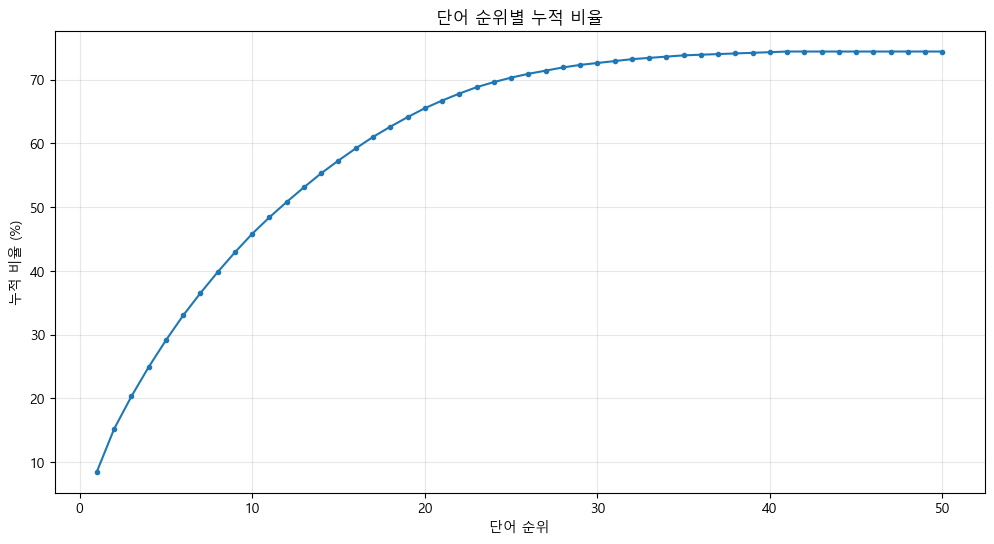

In [10]:
df['cumulative_percentage'] = df['percentage'].cumsum()
df['rank'] = range(1, len(df) + 1)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(df['rank'], df['cumulative_percentage'], marker='o', markersize=3)
plt.title('단어 순위별 누적 비율')
plt.xlabel('단어 순위')
plt.ylabel('누적 비율 (%)')
plt.grid(True, alpha=0.3)
plt.show()


#### 결론 및 요약


In [8]:
print('=== 분석 결과 요약 ===')
print(f'총 분석 단어 수: {total_words:,}개')
print(f'고유 단어 수: {len(df)}개')
print(f'가장 빈번한 단어: "{df.iloc[0]["word"]}" ({df.iloc[0]["frequency"]}회, {df.iloc[0]["percentage"]}%)')
print(f'가장 적은 빈도 단어: "{df.iloc[-1]["word"]}" ({df.iloc[-1]["frequency"]}회, {df.iloc[-1]["percentage"]}%)')
print(f'상위 10개 단어가 차지하는 비율: {df.iloc[9]["cumulative_percentage"]:.1f}%')
print(f'상위 20개 단어가 차지하는 비율: {df.iloc[19]["cumulative_percentage"]:.1f}%')

print('\n=== 단어 유형별 분석 ===')
for word_type in df['word_type'].unique():
    type_data = df[df['word_type'] == word_type]
    total_freq = type_data['frequency'].sum()
    total_pct = type_data['percentage'].sum()
    print(f'{word_type}: {len(type_data)}개 단어, 총 {total_freq}회 사용 ({total_pct:.1f}%)')


=== 분석 결과 요약 ===
총 분석 단어 수: 10,962개
고유 단어 수: 50개
가장 빈번한 단어: "the" (1250회, 8.5%)
가장 적은 빈도 단어: "other" (1회, 0.0%)
상위 10개 단어가 차지하는 비율: 45.8%
상위 20개 단어가 차지하는 비율: 65.5%

=== 단어 유형별 분석 ===
article: 2개 단어, 총 1930회 사용 (13.1%)
conjunction: 4개 단어, 총 1131회 사용 (7.7%)
preposition: 9개 단어, 총 3040회 사용 (20.6%)
verb: 11개 단어, 총 1742회 사용 (11.8%)
pronoun: 14개 단어, 총 2846회 사용 (19.4%)
number: 1개 단어, 총 90회 사용 (0.6%)
noun: 1개 단어, 총 60회 사용 (0.4%)
adverb: 5개 단어, 총 79회 사용 (0.5%)
determiner: 3개 단어, 총 44회 사용 (0.3%)


In [11]:
summary_table = pd.DataFrame({
    '항목': [
        '총 분석 단어 수',
        '고유 단어 수',
        '가장 빈번한 단어',
        '가장 적은 빈도 단어',
        '상위 10개 단어 누적 비율',
        '상위 20개 단어 누적 비율'
    ],
    '값': [
        f'{total_words:,}',
        f'{len(df)}',
        f'{df.iloc[0]["word"]} ({df.iloc[0]["frequency"]}회, {df.iloc[0]["percentage"]}%)',
        f'{df.iloc[-1]["word"]} ({df.iloc[-1]["frequency"]}회, {df.iloc[-1]["percentage"]}%)',
        f'{df.iloc[9]["cumulative_percentage"]:.1f}%',
        f'{df.iloc[19]["cumulative_percentage"]:.1f}%'
    ]
})

type_summary = []
for word_type in df['word_type'].unique():
    type_data = df[df['word_type'] == word_type]
    total_freq = type_data['frequency'].sum()
    total_pct = type_data['percentage'].sum()
    type_summary.append({
        '단어 유형': word_type,
        '단어 수': len(type_data),
        '총 빈도': total_freq,
        '비율(%)': f'{total_pct:.1f}'
    })
type_summary_df = pd.DataFrame(type_summary)

display(summary_table)
display(type_summary_df)


,항목,값
0,총 분석 단어 수,"10,962"
1,고유 단어 수,50
2,가장 빈번한 단어,"the (1250회, 8.5%)"
3,가장 적은 빈도 단어,"other (1회, 0.0%)"
4,상위 10개 단어 누적 비율,45.8%
5,상위 20개 단어 누적 비율,65.5%


,단어 유형,단어 수,총 빈도,비율(%)
0,article,2,1930,13.1
1,conjunction,4,1131,7.7
2,preposition,9,3040,20.6
3,verb,11,1742,11.8
4,pronoun,14,2846,19.4
5,number,1,90,0.6
6,noun,1,60,0.4
7,adverb,5,79,0.5
8,determiner,3,44,0.3
